In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install mailbox

In [3]:
import mailbox

In [4]:
mboxfile = 'All mail Including Spam and Trash.mbox'
mbox = mailbox.mbox(mboxfile)
mbox

In [5]:
# for key in mbox[0].keys():
#     print(key)

In [6]:
import csv

In [8]:
# with open('mailbox.csv', 'w') as outputfile:
#     writer = csv.writer(outputfile)
#     writer.writerow(['subject','from','date','to','label','thread'])
    
#     for message in mbox:
#         writer.writerow([
#             message['subject'],
#             message['from'],
#             message['date'],
#             message['to'],
#             message['X-Gmail-Labels'],
#             message['X-GM-THRID'],
#         ])

In [20]:
df = pd.read_csv('mailbox.csv')

In [21]:
df.shape

(4038, 6)

In [22]:
df.dtypes

subject    object
from       object
date       object
to         object
label      object
thread      int64
dtype: object

In [32]:
df['date'].apply(lambda x: pd.to_datetime(x, errors='coerce',utc=True))

0      2022-12-22 17:12:57+00:00
1      2022-12-22 14:20:24+00:00
2      2022-12-23 15:01:27+00:00
3      2022-12-21 04:58:09+00:00
4      2022-12-28 15:15:55+00:00
                  ...           
4033   2022-08-18 13:30:29+00:00
4034   2022-11-04 20:02:23+00:00
4035   2022-11-03 15:25:55+00:00
4036   2022-05-25 15:31:51+00:00
4037   2022-08-12 13:30:30+00:00
Name: date, Length: 4038, dtype: datetime64[ns, UTC]

In [28]:
df.date = pd.to_datetime(df.date, utc=True, errors='coerce')

In [39]:
df = df[df['date'].notna()]

In [40]:
df.to_csv('gmail.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4038 entries, 0 to 4037
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  3931 non-null   object             
 1   from     4038 non-null   object             
 2   date     4038 non-null   datetime64[ns, UTC]
 3   to       4012 non-null   object             
 4   label    4038 non-null   object             
 5   thread   4038 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 220.8+ KB


In [42]:
df.head()

subject  \
0       1 new data analyst vacancy in Madhya Pradesh   
1                  Complete Machine Learning Project   
2  Reminder: 25% Off Yearly And Lifetime Plans =?...   
3                      Your account has been created   
4  Apply to jobs at WNS India and Global it consu...   

                                                from  \
0                        "Indeed" <alert@indeed.com>   
1  Engineering Wala Bhaiya <engineeringwalabhaiya...   
2       StrataScratch Team <hello@stratascratch.com>   
3                 "Offcloud.com" <help@offcloud.com>   
4                        "Indeed" <alert@indeed.com>   

                       date                          to  \
0 2022-12-22 17:12:57+00:00  <vamshi.kumar59@gmail.com>   
1 2022-12-22 14:20:24+00:00    undisclosed-recipients:;   
2 2022-12-23 15:01:27+00:00    vamshi.kumar59@gmail.com   
3 2022-12-21 04:58:09+00:00     vamshikumar59@gmail.com   
4 2022-12-28 15:15:55+00:00  <vamshi.kumar59@gmail.com>   

                              label               thread  
0      Spam,Category Updates,Unread  1752935094573008624  
1     Spam,Category Personal,Unread  1752924251650457476  
2  Inbox,Opened,Category Promotions  1753017418821954116  
3     Inbox,Category Updates,Unread  1752798268244885481  
4      Spam,Category Updates,Unread  1753471313339058929

In [43]:
import re

In [55]:
def extract_email_ID(string):
    email = re.findall(r'<(.+?)>', string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan

In [57]:
df['from'] = df['from'].apply(lambda x: extract_email_ID(x))

In [60]:
myemail = 'vamshi.kumar59@gmail.com'
df['label'] = df['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [63]:
df.drop(columns='to', inplace=True)
df.head()

subject  \
0       1 new data analyst vacancy in Madhya Pradesh   
1                  Complete Machine Learning Project   
2  Reminder: 25% Off Yearly And Lifetime Plans =?...   
3                      Your account has been created   
4  Apply to jobs at WNS India and Global it consu...   

                              from                      date  label  \
0                 alert@indeed.com 2022-12-22 17:12:57+00:00  inbox   
1  engineeringwalabhaiya@gmail.com 2022-12-22 14:20:24+00:00  inbox   
2          hello@stratascratch.com 2022-12-23 15:01:27+00:00  inbox   
3                help@offcloud.com 2022-12-21 04:58:09+00:00  inbox   
4                 alert@indeed.com 2022-12-28 15:15:55+00:00  inbox   

                thread  
0  1752935094573008624  
1  1752924251650457476  
2  1753017418821954116  
3  1752798268244885481  
4  1753471313339058929

In [64]:
import datetime
import pytz

In [65]:
def refactor_timezone(x):
    est = pytz.timezone('US/Eastern')
    return x.astimezone(est)

In [66]:
df.date

0      2022-12-22 17:12:57+00:00
1      2022-12-22 14:20:24+00:00
2      2022-12-23 15:01:27+00:00
3      2022-12-21 04:58:09+00:00
4      2022-12-28 15:15:55+00:00
                  ...           
4033   2022-08-18 13:30:29+00:00
4034   2022-11-04 20:02:23+00:00
4035   2022-11-03 15:25:55+00:00
4036   2022-05-25 15:31:51+00:00
4037   2022-08-12 13:30:30+00:00
Name: date, Length: 4038, dtype: datetime64[ns, UTC]

In [67]:
df['date'] = df['date'].apply(lambda x: refactor_timezone(x))

In [68]:
df.date

0      2022-12-22 12:12:57-05:00
1      2022-12-22 09:20:24-05:00
2      2022-12-23 10:01:27-05:00
3      2022-12-20 23:58:09-05:00
4      2022-12-28 10:15:55-05:00
                  ...           
4033   2022-08-18 09:30:29-04:00
4034   2022-11-04 16:02:23-04:00
4035   2022-11-03 11:25:55-04:00
4036   2022-05-25 11:31:51-04:00
4037   2022-08-12 09:30:30-04:00
Name: date, Length: 4038, dtype: datetime64[ns, US/Eastern]

In [79]:
df['dayofweek'] = df['date'].apply(lambda x: x.day_name())
df['dayofweek'] = pd.Categorical(df['dayofweek'], categories=[
 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
 'Saturday', 'Sunday'], ordered=True)

In [81]:
df['timeofday'] = df['date'].apply(lambda x: x.hour + x.minute/60 +
x.second/3600)

In [86]:
df.date

0      2022-12-22 12:12:57-05:00
1      2022-12-22 09:20:24-05:00
2      2022-12-23 10:01:27-05:00
3      2022-12-20 23:58:09-05:00
4      2022-12-28 10:15:55-05:00
                  ...           
4033   2022-08-18 09:30:29-04:00
4034   2022-11-04 16:02:23-04:00
4035   2022-11-03 11:25:55-04:00
4036   2022-05-25 11:31:51-04:00
4037   2022-08-12 09:30:30-04:00
Name: date, Length: 4038, dtype: datetime64[ns, US/Eastern]

In [91]:
df['hour'] = df['date'].apply(lambda x: x.hour)

In [92]:
df['year_int'] = df['date'].apply(lambda x:x.year)

In [93]:
df['year'] = df['date'].apply(lambda x: x.year+x.dayofyear/365.25)

In [114]:
sent = df[df['label'] == 'sent']

In [115]:
received = df[df['label'] == 'inbox']

In [117]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [118]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
    ind = np.zeros(len(df), dtype='bool')
    est = pytz.timezone('US/Eastern')
 
    df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax,
    color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))),
    "%H").strftime("%I %p") for ts in ax.get_yticks()]);
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':', color='k')
    return ax


C:\Users\vamsh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\vamsh\AppData\Local\Temp\ipykernel_15804\234234807.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))),


<AxesSubplot: title={'center': 'Received'}>

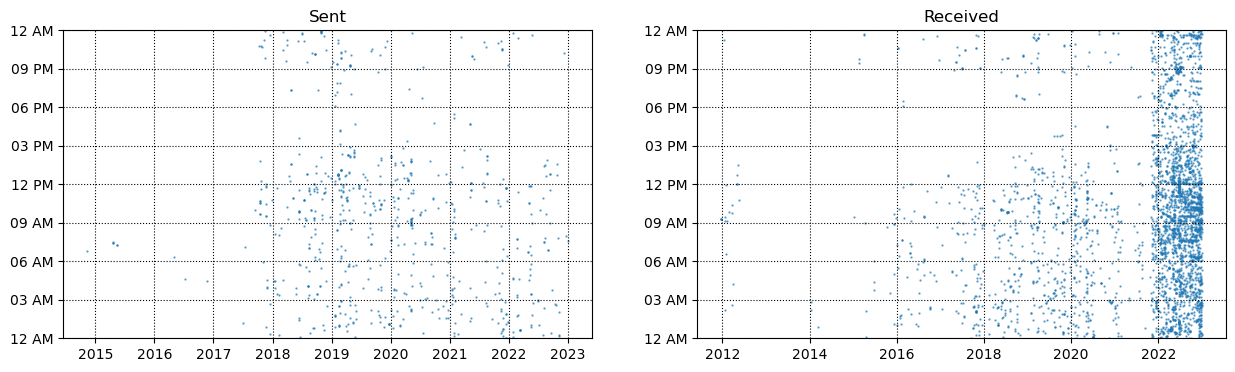

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')


In [120]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')


In [128]:
def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
    weight_fun=None, **plot_kwargs):
    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label,**plot_kwargs);
        ax.grid(ls=':', color='k')
        orientation = plot_kwargs.get('orientation')
        if orientation is None or orientation == 'vertical':
            ax.set_xlim(0, 24)
            ax.xaxis.set_major_locator(MaxNLocator(8))
            ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts,
            24))), "%H").strftime("%I %p")
        for ts in ax.get_xticks()]);
        elif orientation == 'horizontal':
            ax.set_ylim(0, 24)
            ax.yaxis.set_major_locator(MaxNLocator(8))
            ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,
            24))), "%H").strftime("%I %p")
        for ts in ax.get_yticks()]);


In [131]:
class TriplePlot:
    def __init__(self):
        gs = gridspec.GridSpec(6, 6)
        self.ax1 = plt.subplot(gs[2:6, :4])
        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
        plt.setp(self.ax2.get_yticklabels(), visible=False);
        self.ax3 = plt.subplot(gs[:2, :4]) 
        plt.setp(self.ax3.get_xticklabels(), visible=False);
    def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5,
    yr_bin=0.1, hr_bin=0.5):
        plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
        plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color,
    alpha=alpha, orientation='horizontal')
        self.ax2.set_xlabel('Average emails per hour')
        plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color,
    alpha=alpha)
        self.ax3.set_ylabel('Average emails per day')

C:\Users\vamsh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\vamsh\AppData\Local\Temp\ipykernel_15804\234234807.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))),
C:\Users\vamsh\AppData\Local\Temp\ipykernel_15804\2318947761.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,


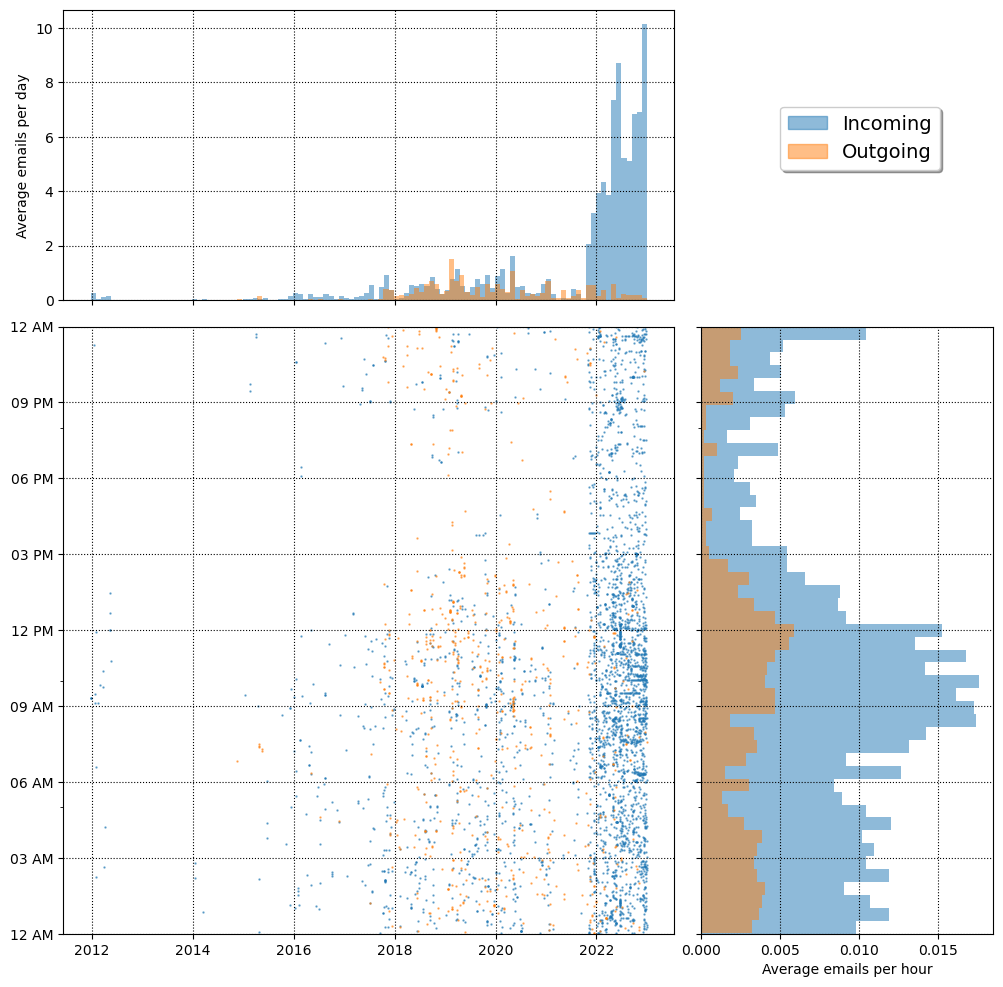

In [132]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
plt.figure(figsize=(12,12));
tpl = TriplePlot()
tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14,
shadow=True);

<AxesSubplot: >

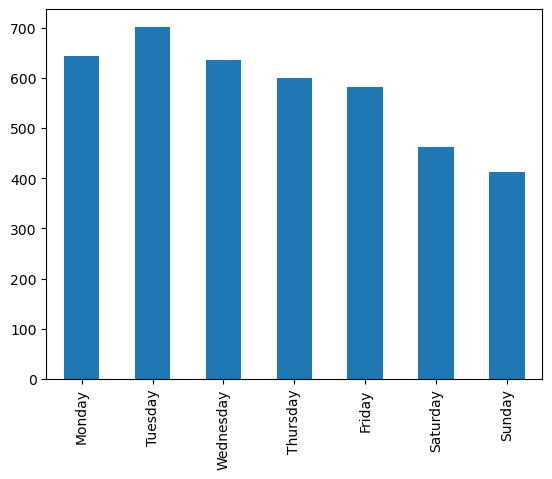

In [134]:
counts = df.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')


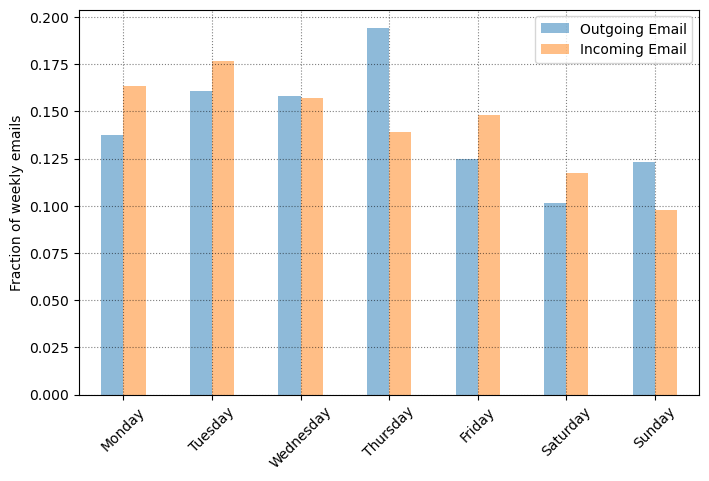

In [135]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)
df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

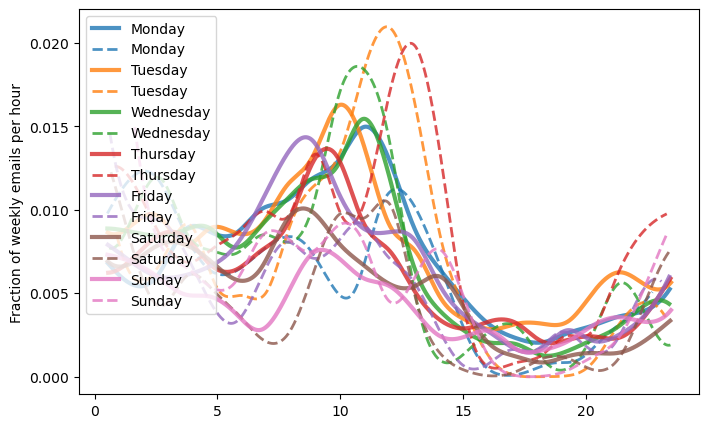

In [137]:
import scipy.ndimage
from scipy.interpolate import interp1d
plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(df.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
    alpha=0.8, lw=3, label=dow, weight_fun=wfun)
    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
    alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')

In [144]:
from wordcloud import WordCloud 
df_no_arxiv = df[df['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

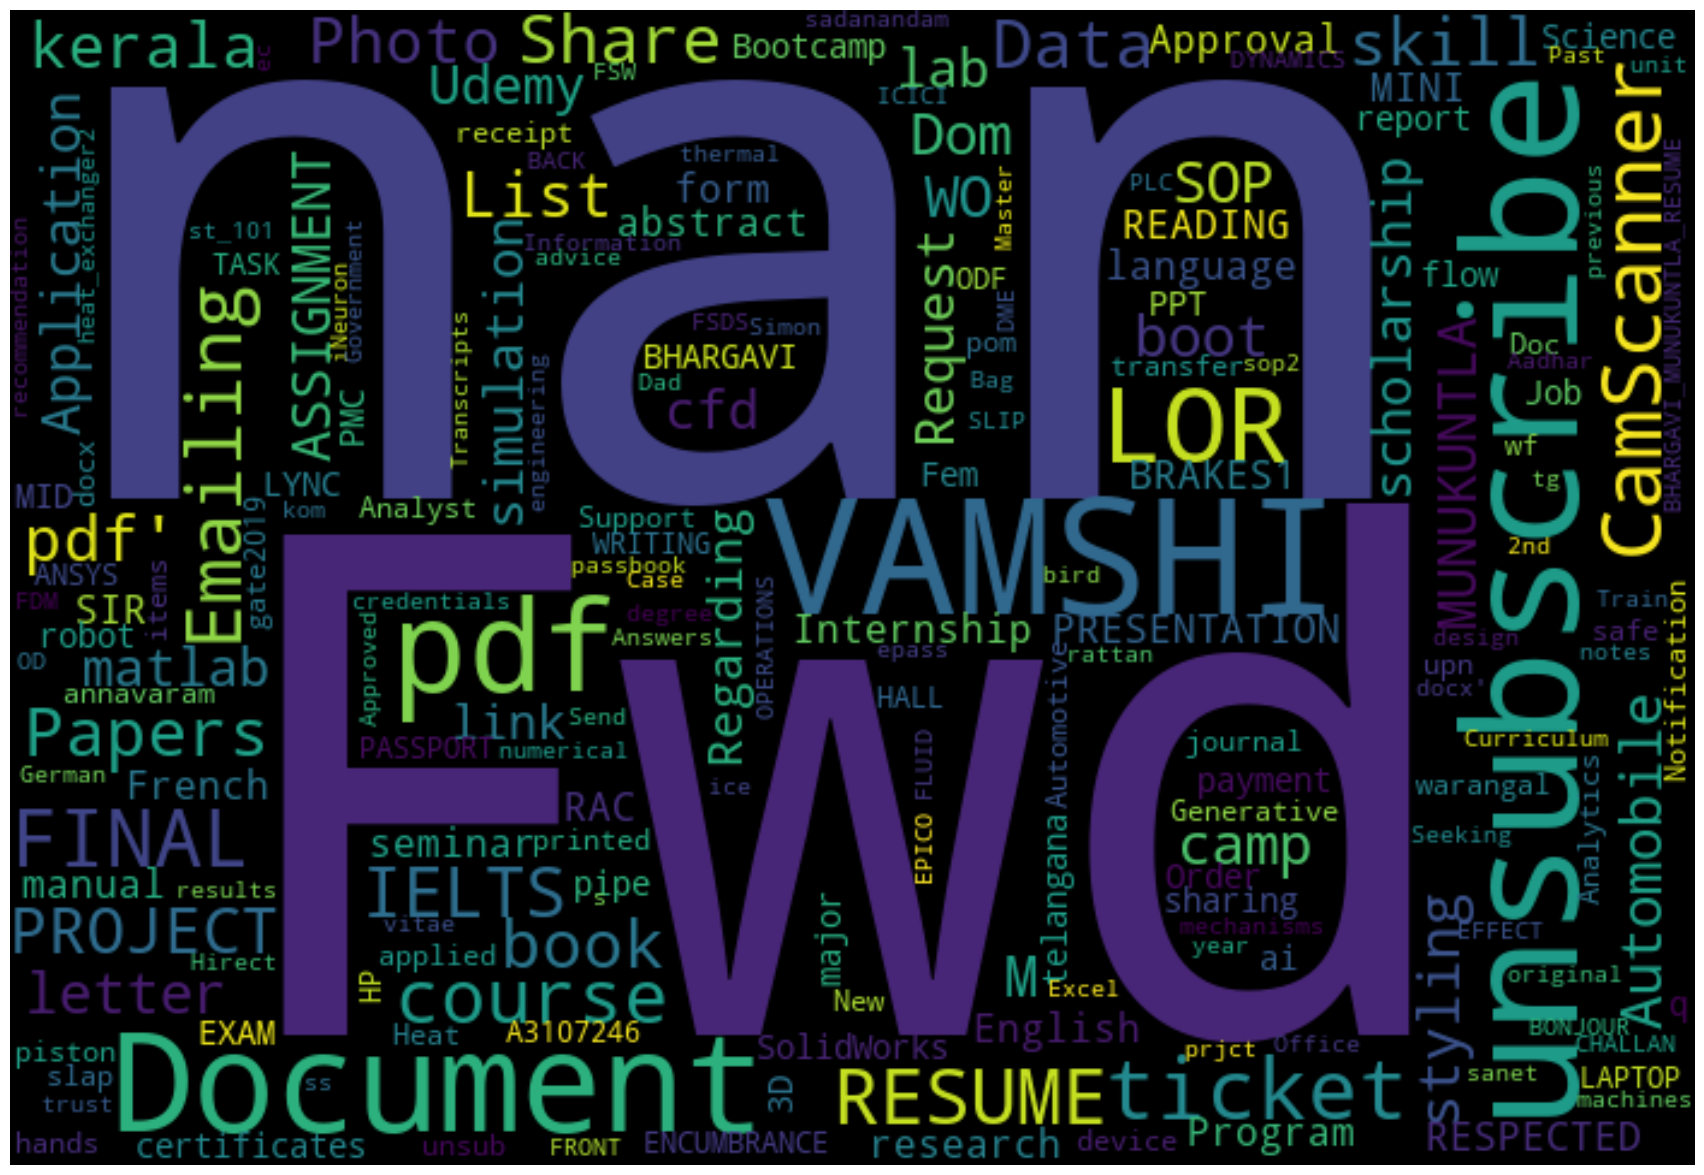

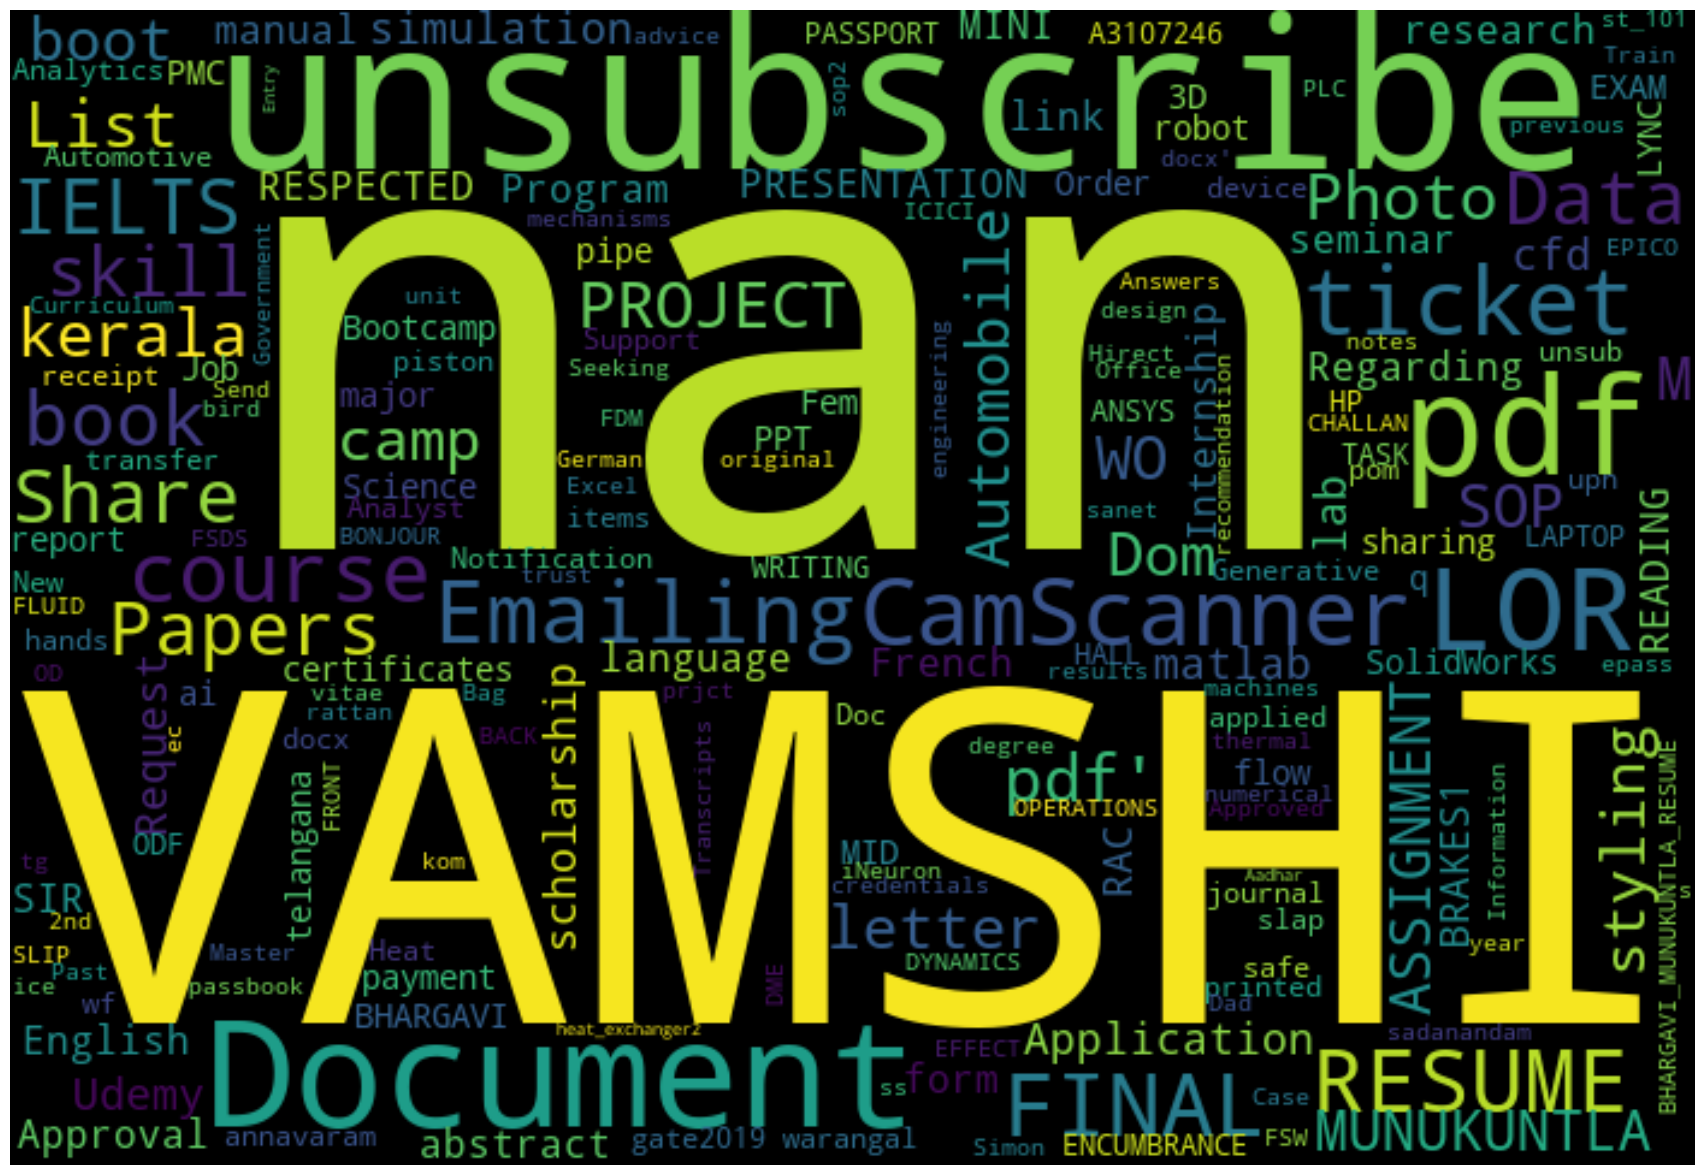

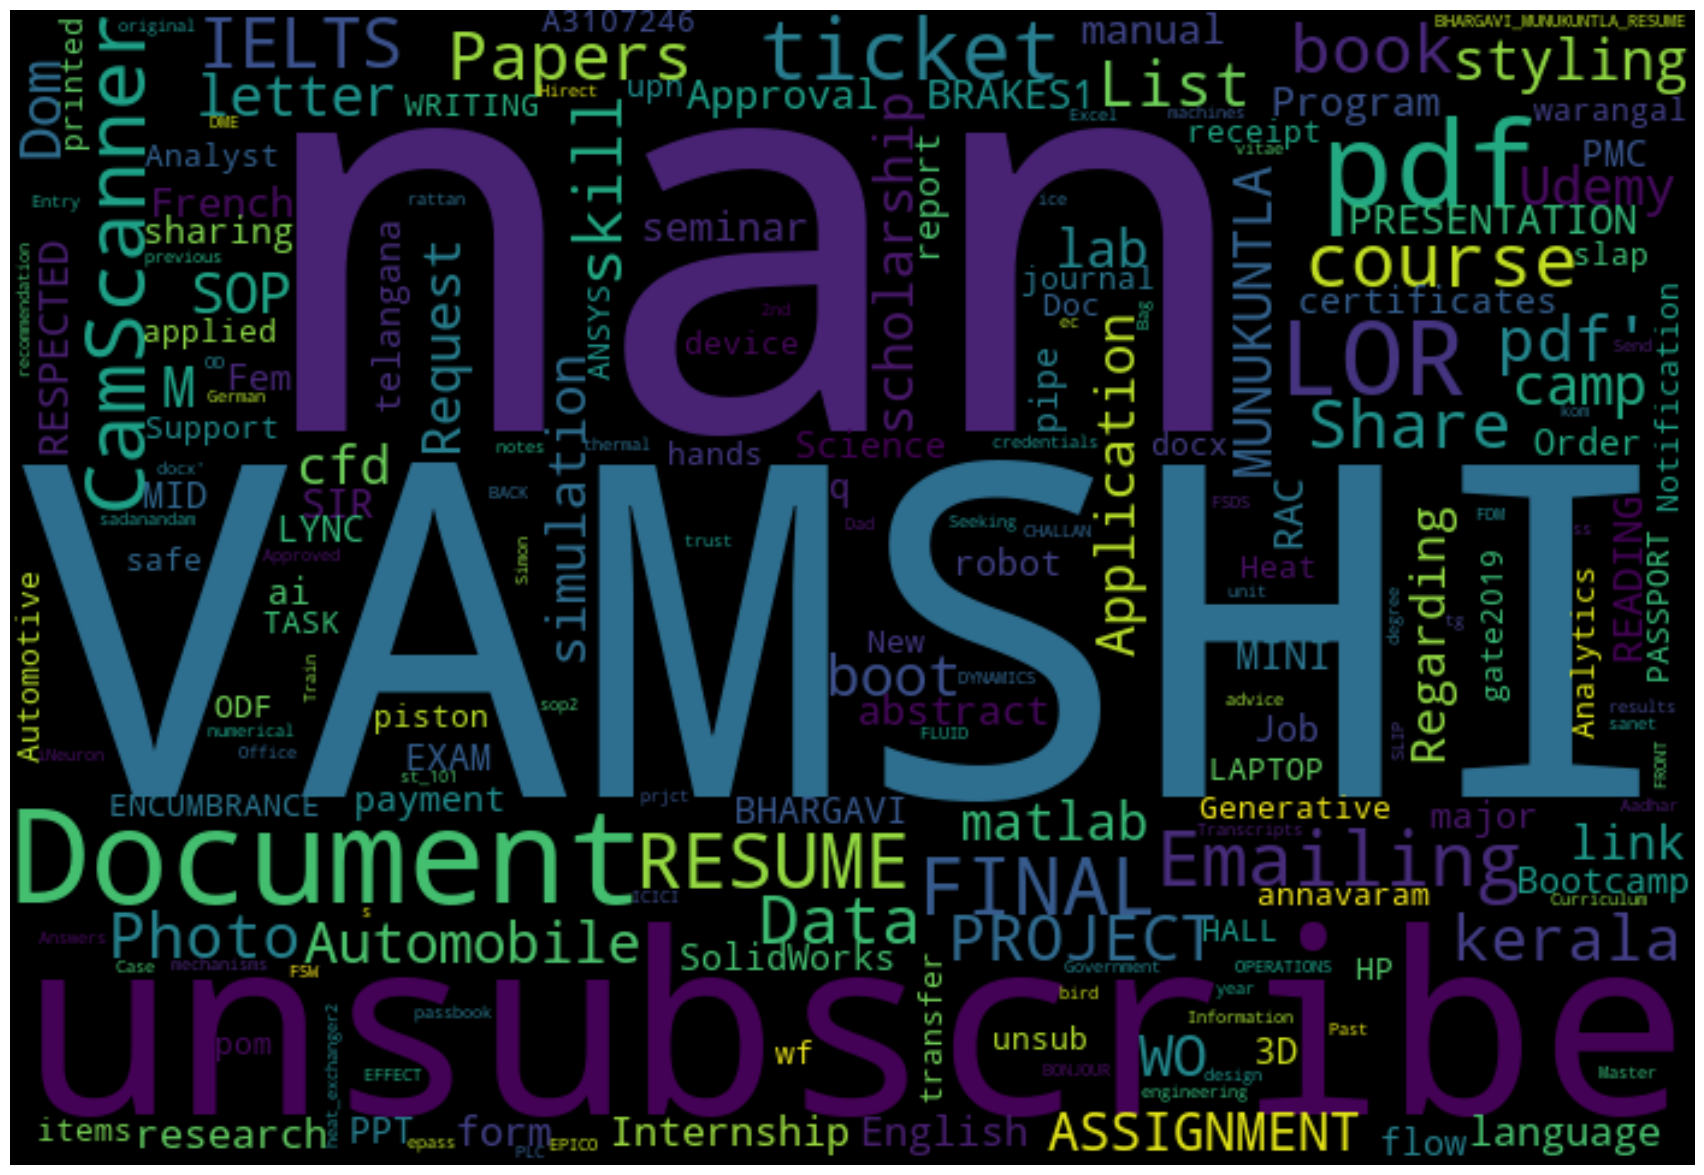

In [145]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
    wordcloud = wrd.generate(text)
    plt.figure(figsize=(25,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)


In [141]:
# !pip install wordcloud